## Classification of IRIS dataset using K-Nearest Neighbors (KNN) Method
#### FAS Research Computing

![KNN](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png)

Image Credit: https://www.datacamp.com

In [ ]:
# Get a list of local variables
%who

> [Jupyter Commands Cheat Sheet](https://www.edureka.co/blog/wp-content/uploads/2018/10/Jupyter_Notebook_CheatSheet_Edureka.pdf)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load scikit-learn standard datasets [e.g., iris]
from sklearn import datasets

# Load scikit-learn train and test split function
from sklearn.model_selection import train_test_split

# Load scikit-learn feature scaling module
from sklearn.preprocessing import StandardScaler

# Load scikit-learn K-Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Load scikit-learn evaluating metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Read dataset to pandas dataframe
iris = datasets.load_iris()

In [3]:
print('  --- Feature Names')
print(iris.feature_names)

print('  --- Features')
print(iris.data[:5])

print('  --- Target Values')
print(iris.target[:100])

print('  --- Target Labels')
print(iris.target_names)

  --- Feature Names
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
  --- Features
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
  --- Target Values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
  --- Target Labels
['setosa' 'versicolor' 'virginica']


In [4]:
# Extract features and labels
x = iris.data 
y = iris.target

In [28]:
# Split data to test and train [80% train, 20% test]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [29]:
# Scale features
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
# Classify data by K-Nearest Neighbors
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

# Prediction
y_prediction = classifier.predict(x_test)

In [31]:
# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[ 9  0  0]
 [ 0  7  1]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        13

   micro avg       0.93      0.93      0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



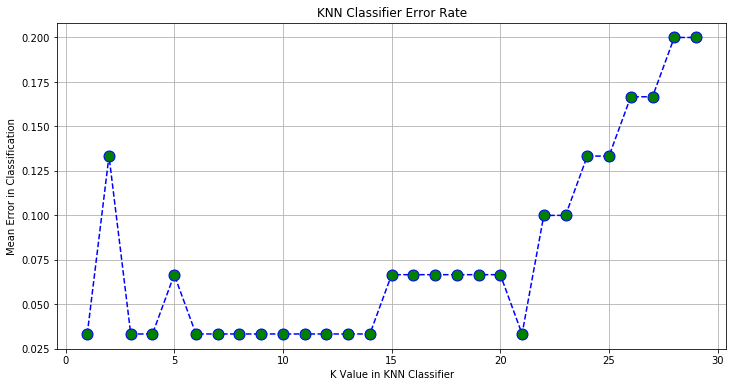

In [32]:
# Plot error vs. K value
error = []

# Error for different K values [between 1 and 30]
for k_val in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k_val)
    knn.fit(x_train, y_train)
    pred_k = knn.predict(x_test)
    error.append(np.mean(pred_k != y_test))
    
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=11)
plt.title('KNN Classifier Error Rate')
plt.xlabel('K Value in KNN Classifier')
plt.ylabel('Mean Error in Classification')
plt.grid(True)
plt.show()

## What is the best value for K?

### Accessing files stored on FASRC cluster

In [19]:
with open('/n/scratchlfs/olveczky_lab/Mahmood/Notebooks_FASRC/iris.data','r') as f:
    data = f.read()

In [ ]:
!pwd

In [21]:
!ls

Data_Classification.ipynb  Data_Clustering.ipynb  iris.data
